# Walmart Sales Analysis

This notebook analyzes Walmart’s historical weekly sales data to understand
sales behavior, seasonality, and high-level business patterns.

The purpose of this analysis is not only to explore the data, but to validate
its structure and quality before performing any business or time-based analysis.


# Environment Setup and Library Imports

* This analysis uses Python and standard data analytics libraries that are
commonly used in industry for data manipulation, visualization, and exploration.

* Importing required libraries at the beginning ensures a consistent and
reproducible analysis environment.


## The following libraries are used:

- **Pandas** for data loading, cleaning, and transformation  
- **NumPy** for numerical operations  
- **Matplotlib** for basic visualizations  
- **Seaborn** for statistical and comparative plots

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
from scipy import stats



sns.set(style="whitegrid")

# File Paths 

In [8]:
# Base project folder
BASE_DIR = Path(r"C:\Users\pavan\Desktop\WALMART SALES")

# Raw data file path
DATA_PATH = BASE_DIR / "data" / "Walmart.csv"

# Output (cleaned) file path
OUTPUT_PATH = BASE_DIR / "data" / "walmart_cleaned.csv"


# Data Loading and Initial Data Validation

* Before performing any analysis, it is critical to load the dataset and
validate its structure, size, and basic quality.

* This step ensures that the data is reliable and suitable for further
time-based and business analysis.

### Loading the Dataset

* The dataset is loaded into a Pandas DataFrame **pd.read_csv()** for analysis.
Pandas is used because it provides efficient tools for inspecting,
cleaning, and transforming structured data.



In [9]:
df = pd.read_csv(DATA_PATH)


### Previewing the First Records of the Dataset

* The first few rows of the dataset are examined to understand how the data
is structured at the beginning.

In [5]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


### Previewing the Last Records of the Dataset

- The last few rows of the dataset are examined to ensure data consistency
throughout the entire file.

In [6]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


### Dataset Size (Rows and Columns)

- The shape of the dataset is checked to understand its overall size.

In [7]:
df.shape 

(6435, 8)

### Dataset Structure and Data Types

The dataset structure and data types are inspected to understand:
- The type of each column (numeric, categorical, date, etc.)
- Whether any columns contain missing values
- Memory usage of the dataset

- This step helps identify columns that may require type conversion
or further preprocessing.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Statistical Summary of Numerical Columns

A statistical summary is generated to understand the distribution
of numerical features in the dataset.

This includes:
- Minimum and maximum values
- Average values
- Spread of the data

- This step helps detect unusual values or outliers
that may impact further analysis.


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Missing Value Check

- Each column is checked for missing values to determine
whether the dataset contains incomplete records.

- Identifying missing data early helps ensure that
subsequent analysis is accurate and reliable.


In [14]:
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Unique Value Analysis

The number of unique values in each column is examined to understand:
- Which columns act as identifiers (such as Store)
- The diversity of values in categorical features
- Potential grouping and aggregation opportunities

- This step supports store-level and category-level analysis later in the project.


In [17]:
df.nunique()


Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

# Date Conversion and Time-Based Feature Engineering

Retail sales analysis is fundamentally time-driven.
To analyze trends, seasonality, and patterns accurately, the Date column
must be converted into a proper datetime format.

Datetime conversion enables:
- Correct chronological sorting
- Time-based grouping (year, month, week)
- Reliable trend and seasonality analysis

- Without this step, any time intelligence analysis may produce
misleading or incorrect results.

### Converting Date Column to Datetime Format

- The Date column is converted from a string format to a datetime object.
- This ensures that time-based operations such as sorting, filtering,
and aggregation behave correctly.


In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [19]:
# Drop rows with invalid critical fields
before_rows = len(df)
df = df.dropna(subset=["Date", "Weekly_Sales", "Store", "Holiday_Flag"])
after_rows = len(df)

print(f"\nDropped {before_rows - after_rows} rows due to invalid critical values")


Dropped 0 rows due to invalid critical values


In [20]:
# Enforce business rules
df = df[df["Weekly_Sales"] > 0]
df = df[df["Holiday_Flag"].isin([0, 1])]

## Sorting Data by Date

* The dataset is sorted by the Date column to ensure that all
time-based visualizations and analyses follow a correct
chronological order.

* This is especially important for trend analysis and time-series plots.


In [21]:
# Sort Chronologically by Date

df = df.sort_values(by='Date').reset_index(drop=True)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
5,25,2010-02-05,677231.63,0,21.10,2.784,204.247194,8.187
6,22,2010-02-05,1033017.37,0,24.36,2.788,135.352461,8.283
7,23,2010-02-05,1364721.58,0,15.25,2.788,131.527903,5.892
8,24,2010-02-05,1388725.63,0,22.43,2.954,131.527903,8.326
9,19,2010-02-05,1507637.17,0,20.96,2.954,131.527903,8.350


## Sales Overview

In [22]:
print(f"Total Sales: ${df['Weekly_Sales'].sum():,.0f}")
print(f"Average Weekly Sales: ${df['Weekly_Sales'].mean():,.0f}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of Stores: {df['Store'].nunique()}")
print(f"Number of Weeks: {df['Date'].nunique()}")

Total Sales: $6,737,218,987
Average Weekly Sales: $1,046,965
Date Range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Number of Stores: 45
Number of Weeks: 143


# STEP 4: Time Based FEATURE ENGINEERING

In [24]:

# This part prepares the data for SQL and Power BI
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.month_name()
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)

## VISUAL VALIDATION 

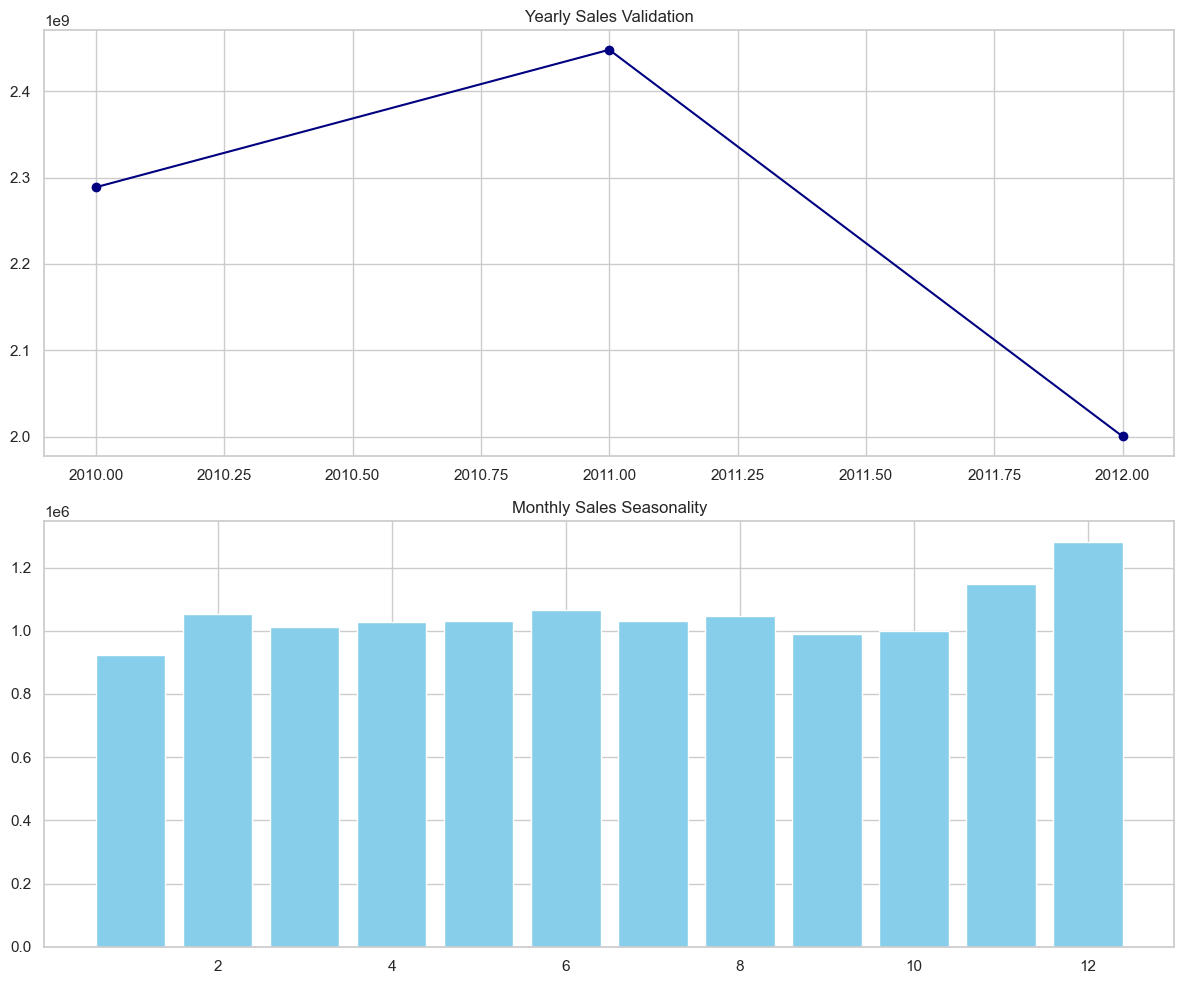

In [25]:
# We use the features we just created to make sure the data looks right
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Yearly Trend
axes[0].plot(yearly_sales.index, yearly_sales.values, marker='o', color='navy')
axes[0].set_title("Yearly Sales Validation")

# Monthly Seasonality
axes[1].bar(monthly_sales.index, monthly_sales.values, color='skyblue')
axes[1].set_title("Monthly Sales Seasonality")

plt.tight_layout()
plt.show()

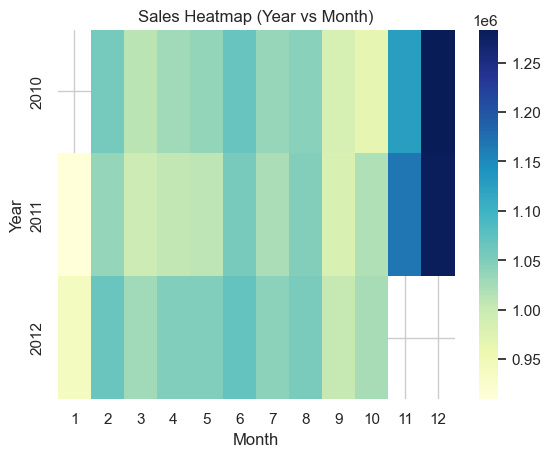

In [26]:
pivot = df.pivot_table(
    values="Weekly_Sales",
    index="Year",
    columns="Month",
    aggfunc="mean"
)

sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Sales Heatmap (Year vs Month)")
plt.show()


# Exploratory data analysis

## NOTE:
- These visuals are for understanding patterns,
- NOT for final reporting (Power BI will handle that)

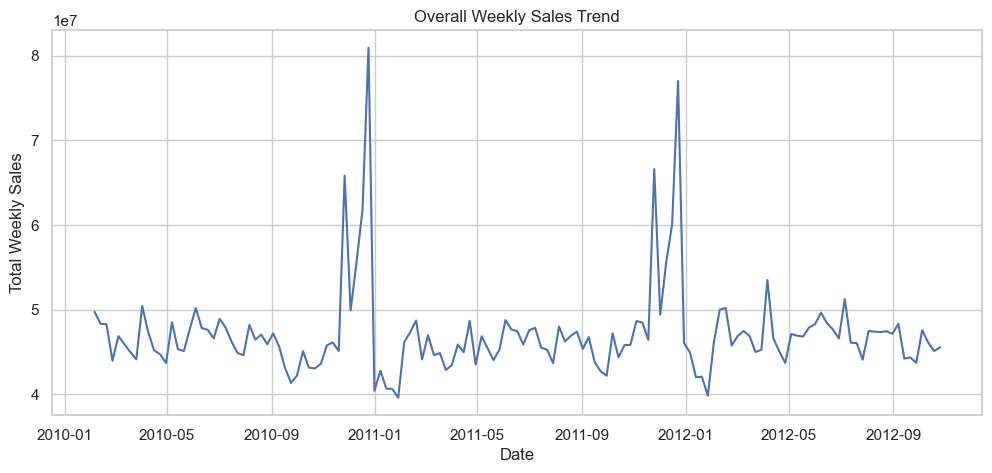

In [27]:
# weekly sales trend
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(12,5)) 
plt.plot(weekly_sales)
plt.title("Overall Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()


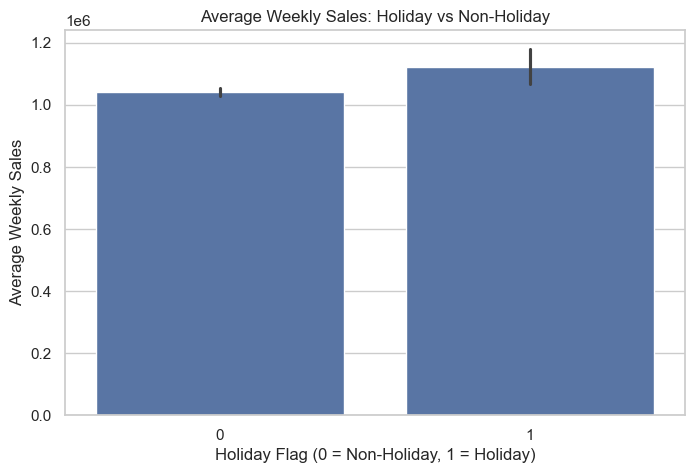

In [28]:
# Holiday vs Non-Holiday average comparison
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday Flag (0 = Non-Holiday, 1 = Holiday)")
plt.ylabel("Average Weekly Sales")  
plt.show()


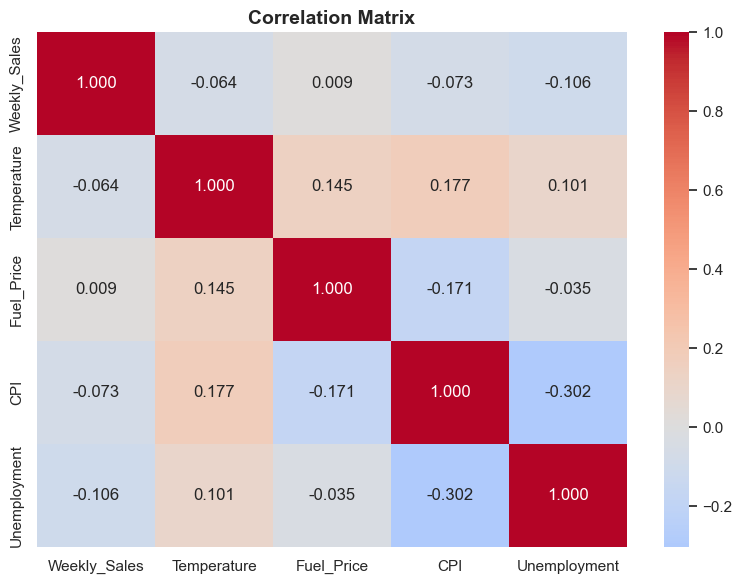

In [19]:
from pathlib import Path

Path("output").mkdir(exist_ok=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_data, annot=True, fmt=".3f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("output/correlation.png", dpi=300)
plt.show()

In [20]:
# ============================================
store_totals = df.groupby('Store').agg({
    'Weekly_Sales': ['sum', 'mean', 'std'],
    'Unemployment': 'mean'
}).round(0)

store_totals.columns = ['Total_Sales', 'Avg_Sales', 'Std_Sales', 'Avg_Unemployment']
store_totals['CV'] = (store_totals['Std_Sales'] / store_totals['Avg_Sales'] * 100).round(1)
store_totals = store_totals.sort_values('Total_Sales', ascending=False)

print("\n" + "="*60)
print("STORE PERFORMANCE")
print("="*60)
print("\nTop 5 Stores:")
print(store_totals.head(5)[['Total_Sales', 'Avg_Sales']].to_string())

print("\nBottom 5 Stores:")
print(store_totals.tail(5)[['Total_Sales', 'Avg_Sales']].to_string())


STORE PERFORMANCE

Top 5 Stores:
       Total_Sales  Avg_Sales
Store                        
20     301397792.0  2107677.0
4      299543953.0  2094713.0
14     288999911.0  2020978.0
13     286517704.0  2003620.0
2      275382441.0  1925751.0

Bottom 5 Stores:
       Total_Sales  Avg_Sales
Store                        
38      55159626.0   385732.0
36      53412215.0   373512.0
5       45475689.0   318012.0
44      43293088.0   302749.0
33      37160222.0   259862.0


In [21]:

# High-risk stores (high unemployment + low sales)
risk_threshold_sales = store_totals['Total_Sales'].quantile(0.25)
risk_threshold_unemp = store_totals['Avg_Unemployment'].quantile(0.75)

high_risk = store_totals[
    (store_totals['Total_Sales'] < risk_threshold_sales) &
    (store_totals['Avg_Unemployment'] > risk_threshold_unemp)
]

print(f"\nHigh-Risk Stores (Low Sales + High Unemployment): {len(high_risk)}")
if len(high_risk) > 0:
    print(high_risk[['Total_Sales', 'Avg_Unemployment']].to_string())



High-Risk Stores (Low Sales + High Unemployment): 2
       Total_Sales  Avg_Unemployment
Store                               
29      77141554.0              10.0
38      55159626.0              13.0


In [23]:
# Split data into holiday and regular weeks
regular = df[df['Holiday_Flag'] == 0]['Weekly_Sales']
holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(holiday, regular, equal_var=False)

print("\n" + "="*60)
print("HOLIDAY IMPACT ANALYSIS")
print("="*60)
print(f"Regular Weeks Avg: ${regular.mean():,.0f}")
print(f"Holiday Weeks Avg: ${holiday.mean():,.0f}")
print(f"Holiday Lift: {((holiday.mean()/regular.mean())-1)*100:+.1f}%")
print(f"T-test p-value: {p_value:.4f}")
print(f"Significant: {'YES' if p_value < 0.05 else 'NO'}")


HOLIDAY IMPACT ANALYSIS
Regular Weeks Avg: $1,041,256
Holiday Weeks Avg: $1,122,888
Holiday Lift: +7.8%
T-test p-value: 0.0076
Significant: YES


In [16]:
holiday_by_month = df[df['Holiday_Flag']==1].groupby('Month')['Weekly_Sales'].mean()
regular_by_month = df[df['Holiday_Flag']==0].groupby('Month')['Weekly_Sales'].mean()
lift_by_month = ((holiday_by_month - regular_by_month) / regular_by_month * 100).dropna()

print("\nHoliday Lift by Month:")
for month, lift in lift_by_month.items():
    print(f"  Month {month}: {lift:+.1f}%")


Holiday Lift by Month:
  Month 2: +3.3%
  Month 9: +7.1%
  Month 11: +41.6%
  Month 12: -29.5%


# 6. Final Data Quality Check


In [29]:
print("\nFinal Dataset Summary:")
print(df.info())

print("\nFinal Date Range:")
print(df["Date"].min(), "to", df["Date"].max())

print("\nHoliday Flag Distribution:")
print(df["Holiday_Flag"].value_counts())


Final Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Month_Name    6435 non-null   object        
 11  Week          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2), object(1)
memory usage: 528.0+ KB
None

Final Date Range:
2010-02-05 00:00:00 to 2012-10-26 00:00:00

Holiday 

# 7. Export Cleaned Dataset (Authoritative Output)


In [31]:

OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(OUTPUT_PATH, index=False, date_format="%Y-%m-%d")


## Transition to SQL-Based Analysis

Up to this point, Python has been used for:
- Data understanding and validation
- Feature engineering
- Time-based trend and seasonality analysis
- Validating the impact of holidays on sales

In a real-world analytics workflow, business KPIs such as store rankings,
holiday uplift by store, and final aggregations are typically handled using SQL
for scalability and consistency.

The next phase of this project will shift these calculations to SQL,
followed by visualization in Power BI.
